<a href="https://colab.research.google.com/github/Devashish-23/Devashish-23/blob/main/TSA_ELA_code_group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Install the missing 'arch' library
!pip install arch

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 13.6 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("/content/Coffee_2020_2025_with_weekends_NaN.csv", skiprows=3, header=None)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ensure 'Close' column is numeric
df['Close'] = pd.to_numeric(df['Close'])

df = df.loc["2020-01-01":"2025-12-31"]

# Create log returns for volatility models
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
df.dropna(inplace=True)

In [ ]:
import pandas as pd
import numpy as np

# Load dataset, skipping initial metadata rows and explicitly setting column names
df = pd.read_csv("/content/Coffee_2020_2025_with_weekends_NaN.csv", skiprows=3, header=None)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Convert Date column properly to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ensure 'Close' column is numeric (this step was needed in AslAQXVQhk_C)
df['Close'] = pd.to_numeric(df['Close'])

print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2020-01-01 to 2025-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   float64
dtypes: float64(5)
memory usage: 102.8 KB
None


In [ ]:
import pandas as pd
import numpy as np

# Load your current dataset
df = pd.read_csv("Coffee_2020_2025_with_weekends_NaN.csv", skiprows=3, header=None)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Convert Date
df['Date'] = pd.to_datetime(df['Date'])

# Remove rows where Close is NaN
df = df[df['Close'].notna()]

# Set index
df.set_index('Date', inplace=True)

# Sort properly
df = df.sort_index()

# Create Log Returns
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Remove first NaN from return calculation
df.dropna(inplace=True)

# Save clean version
df.to_csv("/content/Coffee_2020_2025_with_weekends_NaN.csv")

print("Final dataset shape:", df.shape)
print("Missing values:\n", df.isna().sum())

Final dataset shape: (1510, 6)
Missing values:
 Open          0
High          0
Low           0
Close         0
Volume        0
Log_Return    0
dtype: int64


In [ ]:
print("FIRST 5 ROWS:")
print(df.head())


FIRST 5 ROWS:
                  Open        High         Low       Close   Volume  \
Date                                                                  
2020-01-03  127.199997  128.449997  125.449997  126.349998  16566.0   
2020-01-06  126.250000  126.550003  121.550003  122.150002  24428.0   
2020-01-07  122.599998  123.400002  119.849998  122.400002  21308.0   
2020-01-08  122.500000  123.050003  118.250000  119.150002  23061.0   
2020-01-09  118.699997  120.349998  117.000000  117.349998  24637.0   

            Log_Return  
Date                    
2020-01-03   -0.005918  
2020-01-06   -0.033806  
2020-01-07    0.002045  
2020-01-08   -0.026911  
2020-01-09   -0.015222  


In [ ]:
print("LAST 5 ROWS:")
print(df.tail())


LAST 5 ROWS:
                  Open        High         Low       Close   Volume  \
Date                                                                  
2025-12-24  348.100006  348.649994  343.049988  345.149994      0.0   
2025-12-26  345.799988  350.700012  344.299988  350.250000   7348.0   
2025-12-29  349.500000  354.299988  347.049988  352.149994   9184.0   
2025-12-30  350.549988  359.299988  349.500000  350.200012  11564.0   
2025-12-31  349.500000  353.850006  348.049988  348.750000      0.0   

            Log_Return  
Date                    
2025-12-24   -0.005202  
2025-12-26    0.014668  
2025-12-29    0.005410  
2025-12-30   -0.005553  
2025-12-31   -0.004149  


In [ ]:
print("Missing Values:")
print(df.isna().sum())


Missing Values:
Open          0
High          0
Low           0
Close         0
Volume        0
Log_Return    0
dtype: int64


In [ ]:
print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Open         High          Low        Close        Volume  \
count  1510.000000  1510.000000  1510.000000  1510.000000   1510.000000   
mean    211.710629   214.423212   209.109404   211.713245  11866.970861   
std      85.584210    86.845659    84.447703    85.604349  11332.936695   
min      93.250000    95.250000    92.699997    93.650002      0.000000   
25%     150.412495   152.025002   148.825001   150.949997     27.250000   
50%     193.474998   195.800003   191.000000   193.625000  12312.000000   
75%     243.175003   245.437496   239.624996   243.025002  20304.000000   
max     435.399994   440.850006   424.049988   438.899994  49900.000000   

        Log_Return  
count  1510.000000  
mean      0.000668  
std       0.022965  
min      -0.090209  
25%      -0.013772  
50%       0.000000  
75%       0.015214  
max       0.095568  


In [ ]:
highest_close = df['Close'].max()
highest_date = df['Close'].idxmax()

print("Highest Close:", highest_close)
print("Date of Highest Close:", highest_date)


Highest Close: 438.8999938964844
Date of Highest Close: 2025-02-13 00:00:00


In [ ]:
lowest_close = df['Close'].min()
lowest_date = df['Close'].idxmin()

print("Lowest Close:", lowest_close)
print("Date of Lowest Close:", lowest_date)


Lowest Close: 93.6500015258789
Date of Lowest Close: 2020-06-16 00:00:00


In [ ]:
print("Highest Volume:", df['Volume'].max())
print("Date:", df['Volume'].idxmax())


Highest Volume: 49900.0
Date: 2022-02-08 00:00:00


In [ ]:
print("Lowest Volume:", df['Volume'].min())
print("Date:", df['Volume'].idxmin())


Lowest Volume: 0.0
Date: 2020-05-04 00:00:00


In [ ]:
print(df.head(10))

                  Open        High         Low       Close   Volume  \
Date                                                                  
2020-01-03  127.199997  128.449997  125.449997  126.349998  16566.0   
2020-01-06  126.250000  126.550003  121.550003  122.150002  24428.0   
2020-01-07  122.599998  123.400002  119.849998  122.400002  21308.0   
2020-01-08  122.500000  123.050003  118.250000  119.150002  23061.0   
2020-01-09  118.699997  120.349998  117.000000  117.349998  24637.0   
2020-01-10  117.750000  119.150002  116.500000  118.949997  21165.0   
2020-01-13  118.550003  118.550003  114.150002  114.550003  22280.0   
2020-01-14  115.000000  115.550003  113.699997  114.900002  18618.0   
2020-01-15  115.300003  116.349998  114.050003  114.300003  24677.0   
2020-01-16  114.300003  115.099998  112.349998  112.949997  16708.0   

            Log_Return  
Date                    
2020-01-03   -0.005918  
2020-01-06   -0.033806  
2020-01-07    0.002045  
2020-01-08   -0.026911

In [ ]:
print(df.head(10))

                  Open        High         Low       Close   Volume  \
Date                                                                  
2020-01-03  127.199997  128.449997  125.449997  126.349998  16566.0   
2020-01-06  126.250000  126.550003  121.550003  122.150002  24428.0   
2020-01-07  122.599998  123.400002  119.849998  122.400002  21308.0   
2020-01-08  122.500000  123.050003  118.250000  119.150002  23061.0   
2020-01-09  118.699997  120.349998  117.000000  117.349998  24637.0   
2020-01-10  117.750000  119.150002  116.500000  118.949997  21165.0   
2020-01-13  118.550003  118.550003  114.150002  114.550003  22280.0   
2020-01-14  115.000000  115.550003  113.699997  114.900002  18618.0   
2020-01-15  115.300003  116.349998  114.050003  114.300003  24677.0   
2020-01-16  114.300003  115.099998  112.349998  112.949997  16708.0   

            Log_Return  
Date                    
2020-01-03   -0.005918  
2020-01-06   -0.033806  
2020-01-07    0.002045  
2020-01-08   -0.026911

Holts Winters (WALK FORWARD)

In [ ]:
train = df.loc['2020-01-01':'2024-12-31']
test  = df.loc['2025-01-01':'2025-12-31']

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

history = list(train['Close'])
hw_predictions = []

for t in range(len(test)):

    model = ExponentialSmoothing(
        history,
        trend='add',
        seasonal=None
    ).fit()

    yhat = model.forecast(1)[0]
    hw_predictions.append(yhat)

    history.append(test['Close'].iloc[t])

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Use full dataset
full_series = df['Close']

hw_model = ExponentialSmoothing(
    full_series,
    trend='add',
    seasonal=None
).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
next_day_prediction = hw_model.forecast(1)

print("Next Day Holt-Winters Prediction:")
print(next_day_prediction)


Next Day Holt-Winters Prediction:
1510    348.901873
dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
import pandas as pd

next_date = pd.bdate_range(
    start=df.index[-1] + pd.Timedelta(days=1),
    periods=1
)

print("Next Business Date:", next_date[0])

Next Business Date: 2026-01-01 00:00:00


In [ ]:
print(f"Predicted Close Price for {next_date[0].date()} : {next_day_prediction.iloc[0]:.2f}")


Predicted Close Price for 2026-01-01 : 348.90


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

hw_mse = mean_squared_error(test['Close'], hw_predictions)
hw_rmse = np.sqrt(hw_mse)
hw_mape = mean_absolute_percentage_error(test['Close'], hw_predictions)

print("Holt-Winters Results")
print("MSE :", hw_mse)
print("RMSE:", hw_rmse)
print("MAPE:", hw_mape)

Holt-Winters Results
MSE : 79.77803781733117
RMSE: 8.931855228189223
MAPE: 0.018539489878128264


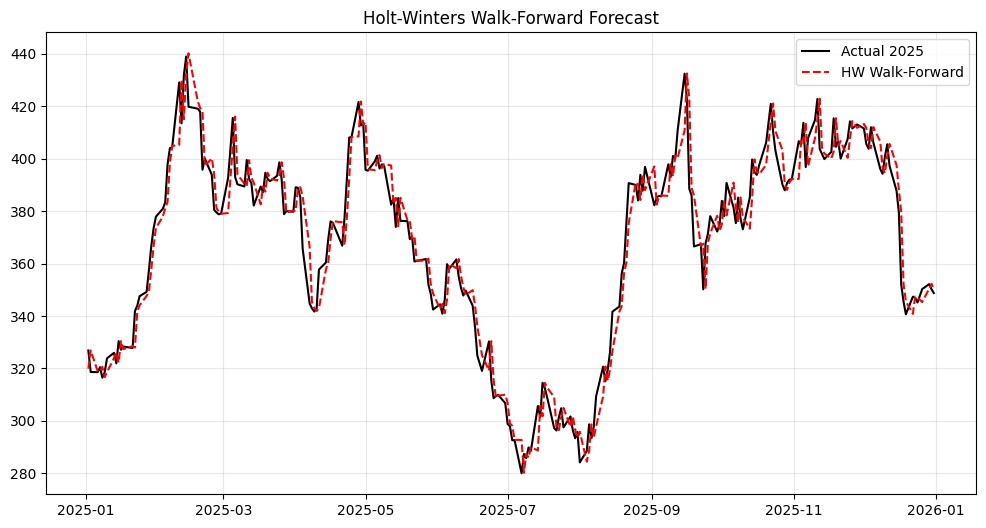

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(test.index, test['Close'],
         color='black', label='Actual 2025')

plt.plot(test.index, hw_predictions,
         color='red', linestyle='--',
         label='HW Walk-Forward')

plt.title("Holt-Winters Walk-Forward Forecast")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


ARIMA (WALK FORWARD)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [ ]:
arima_predictions = []
history = list(train['Close'])

for t in range(len(test)):

    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()

    yhat = model_fit.forecast()[0]   # Next day forecast
    arima_predictions.append(yhat)

    history.append(test['Close'].iloc[t])


In [ ]:
def evaluate(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mse, rmse, mape

arima_mse, arima_rmse, arima_mape = evaluate(test['Close'], arima_predictions)

print("ARIMA Results (2025 Test Set)")
print("MSE:", arima_mse)
print("RMSE:", arima_rmse)
print("MAPE:", arima_mape)


ARIMA Results (2025 Test Set)
MSE: 79.48548794542856
RMSE: 8.915463417311999
MAPE: 1.8476403055798292


In [ ]:
final_model = ARIMA(df['Close'], order=(1,1,1))
final_fit = final_model.fit()

arima_next_day_forecast = final_fit.forecast().iloc[0] # Storing in a new variable

print("Next Day Forecast Price (ARIMA):", arima_next_day_forecast)

Next Day Forecast Price (ARIMA): 348.58867487499157


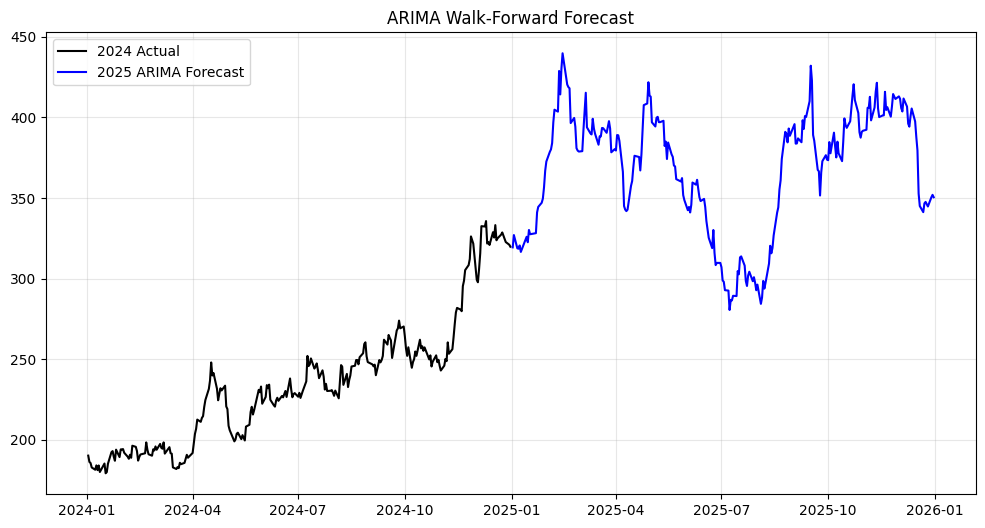

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df.loc['2024', 'Close'],
         color='black',
         label='2024 Actual')

plt.plot(test.index,
         arima_predictions,
         color='blue',
         label='2025 ARIMA Forecast')

plt.title("ARIMA Walk-Forward Forecast")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
SARIMA (WALK FORWARD)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/Coffee_2020_2025_with_weekends_NaN.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df = df[['Close']]
df = df.dropna()
df = df.sort_index()

df.head()


,Close
Date,
2020-01-03,126.349998
2020-01-06,122.150002
2020-01-07,122.400002
2020-01-08,119.150002
2020-01-09,117.349998


In [ ]:
train = df[:'2024-12-31']
test = df['2025-01-01':]

print("Train:", len(train))
print("Test:", len(test))


Train: 1258
Test: 252


In [ ]:
train = df[:'2024-12-31']
test = df['2025-01-01':]


In [ ]:
model = SARIMAX(train['Close'],
                order=(1,1,1),
                seasonal_order=(0,1,1,5),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

print(model_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 1258
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 5)   Log Likelihood               -3597.282
Date:                           Sun, 15 Feb 2026   AIC                           7202.564
Time:                                   06:29:12   BIC                           7223.072
Sample:                                        0   HQIC                          7210.275
                                          - 1258                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9012      0.103     -8.790      0.000      -1.102      -0.700
ma.L1          0.8774      0.113      7.796

In [ ]:
df.index = pd.DatetimeIndex(df.index)
df = df.asfreq('B')  # Business day frequency
df = df.dropna()


In [ ]:
train = df[:'2024-12-31']
test = df['2025-01-01':]


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_predictions = []
history = list(train['Close'])

for t in range(len(test)):

    model = SARIMAX(history,
                    order=(1,1,1),
                    seasonal_order=(0,1,1,5),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    model_fit = model.fit(disp=False)

    forecast = model_fit.forecast(steps=1)
    yhat = forecast[0]   # FIXED (no .values)

    sarima_predictions.append(yhat)

    history.append(test['Close'].iloc[t])


In [ ]:
sarima_predictions = model_fit.forecast(steps=len(test))


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

sarima_mse = mean_squared_error(test['Close'], sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
mape = np.mean(np.abs((test['Close'] - sarima_predictions) / test['Close'])) * 100

print("SARIMA Results")
print("MSE:", sarima_mse)
print("RMSE:", sarima_rmse)
print("MAPE:", mape)


SARIMA Results
MSE: 1496.778290991756
RMSE: 38.68821902067548
MAPE: 8.893789428878208


In [ ]:
final_model = SARIMAX(df['Close'],
                      order=(1,1,1),
                      seasonal_order=(0,1,1,5),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

final_fit = final_model.fit(disp=False)

next_day_forecast = final_fit.forecast(steps=1).iloc[0]

print("Next Day Forecast (SARIMA):", next_day_forecast)

Next Day Forecast (SARIMA): 348.8616165654976


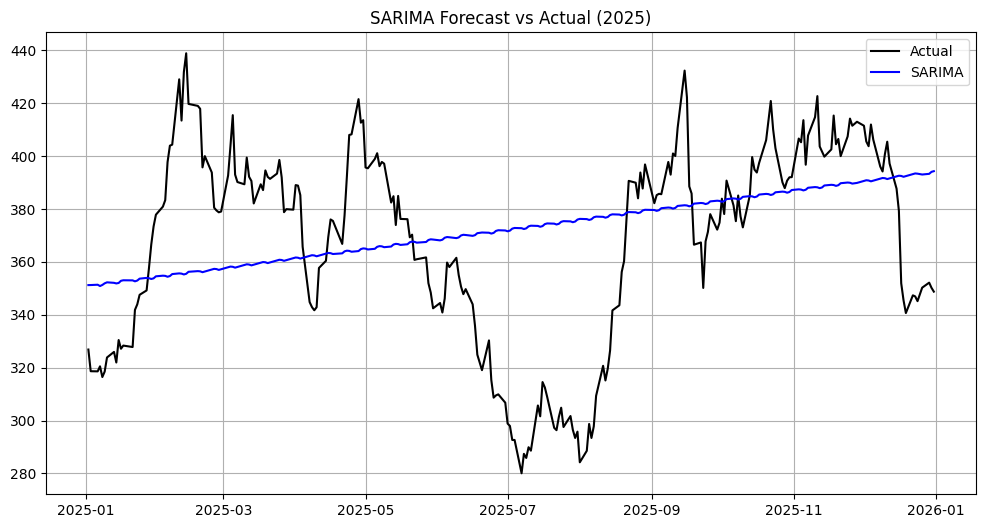

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(test.index, test['Close'], label='Actual', color='black')
plt.plot(test.index, sarima_predictions, label='SARIMA', color='blue')

plt.title("SARIMA Forecast vs Actual (2025)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
last_date = df.index[-1]
next_date = last_date + pd.tseries.offsets.BDay(1)


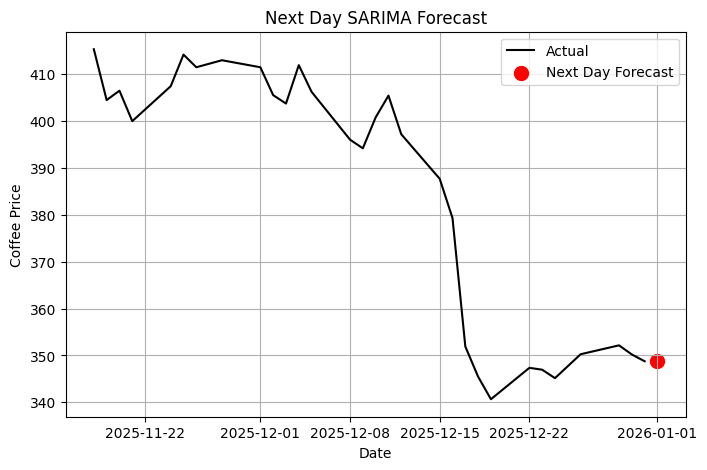

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Plot last 30 days for zoom view
plt.plot(df.index[-30:], df['Close'][-30:], label='Actual', color='black')

# Plot next day forecast
plt.scatter(next_date, next_day_forecast, color='red', label='Next Day Forecast', s=100)

plt.title("Next Day SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Coffee Price")
plt.legend()
plt.grid(True)

plt.show()

ARCH


In [ ]:
import numpy as np

df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df = df.dropna()


In [ ]:
train = df[:'2024-12-31']
test = df['2025-01-01':]

train_returns = train['Returns']
test_returns = test['Returns']


In [ ]:
from arch import arch_model

arch_model_fit = arch_model(train_returns,
                            vol='ARCH',
                            p=1).fit(disp='off')

print(arch_model_fit.summary())


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2973.59
Distribution:                  Normal   AIC:                          -5941.18
Method:            Maximum Likelihood   BIC:                          -5925.78
                                        No. Observations:                 1257
Date:                Sun, Feb 15 2026   Df Residuals:                     1256
Time:                        06:59:44   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.4163e-04  6.324e-04      1.173      0.241 

In [ ]:
arch_forecast = arch_model_fit.forecast(horizon=len(test))

# Extract forecasted variance
arch_variance = arch_forecast.variance.iloc[-1].values

# Convert variance to volatility (std dev)
arch_volatility = np.sqrt(arch_variance)


In [ ]:
actual_volatility = test_returns**2


In [ ]:
from sklearn.metrics import mean_squared_error

arch_mse = mean_squared_error(actual_volatility, arch_variance)
arch_rmse = np.sqrt(arch_mse)
mape = np.mean(np.abs((actual_volatility - arch_variance) / actual_volatility)) * 100

print("ARCH Results (Volatility)")
print("MSE:", arch_mse)
print("RMSE:", arch_rmse)
print("MAPE:", mape)


ARCH Results (Volatility)
MSE: 7.717835887579253e-07
RMSE: 0.0008785121449120241
MAPE: inf


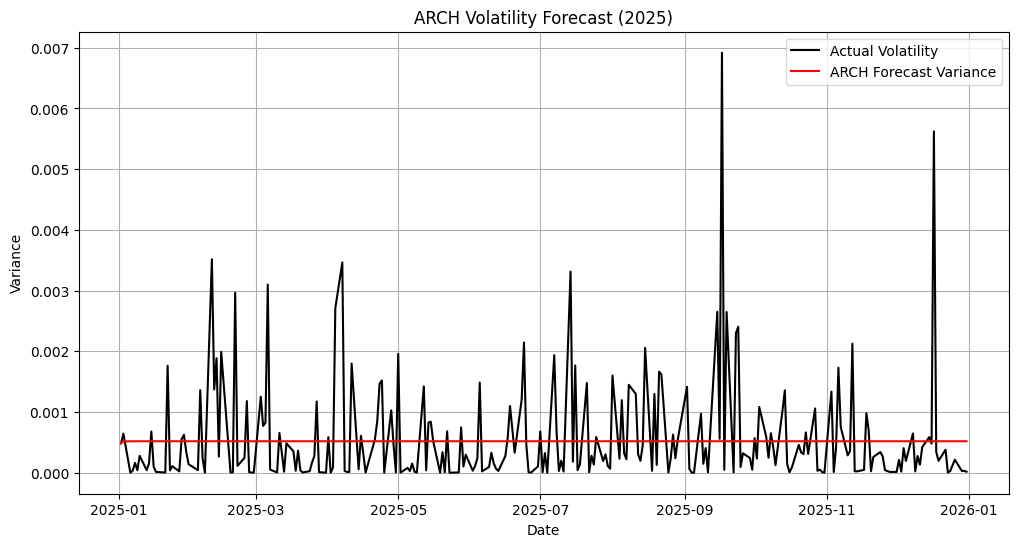

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(test.index, actual_volatility, label='Actual Volatility', color='black')
plt.plot(test.index, arch_variance, label='ARCH Forecast Variance', color='red')

plt.title("ARCH Volatility Forecast (2025)")
plt.xlabel("Date")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)

plt.show()


GARCH


In [ ]:
# Already created earlier
# df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))

train = df[:'2024-12-31']
test = df['2025-01-01':]

train_returns = train['Returns']
test_returns = test['Returns']


In [ ]:
from arch import arch_model

garch_model_fit = arch_model(train_returns,
                             vol='GARCH',
                             p=1,
                             q=1).fit(disp='off')

print(garch_model_fit.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2986.07
Distribution:                  Normal   AIC:                          -5964.14
Method:            Maximum Likelihood   BIC:                          -5943.59
                                        No. Observations:                 1257
Date:                Sun, Feb 15 2026   Df Residuals:                     1256
Time:                        07:04:37   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.9342e-04  6.224e-04      0.953      0.340 

In [ ]:
garch_forecast = garch_model_fit.forecast(horizon=len(test))

# Extract forecasted variance
garch_variance = garch_forecast.variance.iloc[-1].values

# Convert to volatility (std dev)
garch_volatility = np.sqrt(garch_variance)


In [ ]:
garch_forecast = garch_model_fit.forecast(horizon=len(test))

# Extract forecasted variance
garch_variance = garch_forecast.variance.iloc[-1].values

# Convert to volatility (std dev)
garch_volatility = np.sqrt(garch_variance)


In [ ]:
actual_volatility = test_returns**2


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

garch_mse = mean_squared_error(actual_volatility, garch_variance)
garch_rmse = np.sqrt(garch_mse)

print("GARCH Results (Volatility)")
print("MSE:", garch_mse)
print("RMSE:", garch_rmse)


GARCH Results (Volatility)
MSE: 7.710446872995572e-07
RMSE: 0.0008780915028056912


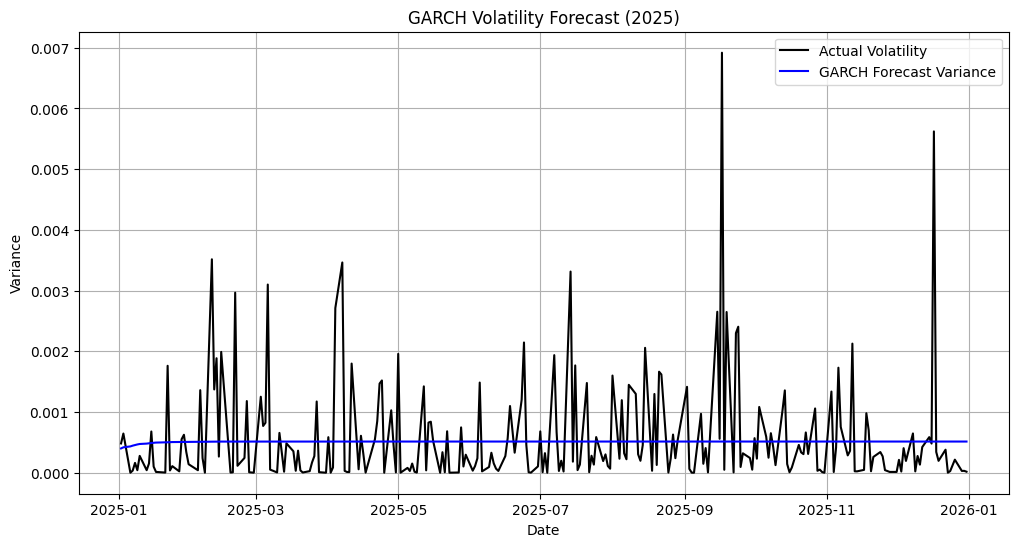

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(test.index, actual_volatility, label='Actual Volatility', color='black')
plt.plot(test.index, garch_variance, label='GARCH Forecast Variance', color='blue')

plt.title("GARCH Volatility Forecast (2025)")
plt.xlabel("Date")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
final_garch = arch_model(df['Returns'],
                         vol='GARCH',
                         p=1,
                         q=1).fit(disp='off')

next_vol = final_garch.forecast(horizon=1)

next_variance = next_vol.variance.iloc[-1,0]
next_std = np.sqrt(next_variance)

print("Next Day Forecast Variance:", next_variance)
print("Next Day Forecast Volatility (Std Dev):", next_std)


Next Day Forecast Variance: 0.0004651242107722905
Next Day Forecast Volatility (Std Dev): 0.021566738528861765


In [ ]:
garch_forecast = garch_model_fit.forecast(horizon=len(test))


In [ ]:
garch_variance = []

rolling_returns = train_returns.copy()

for i in range(len(test_returns)):

    model = arch_model(rolling_returns,
                       vol='GARCH',
                       p=1,
                       q=1)

    model_fit = model.fit(disp='off')

    forecast = model_fit.forecast(horizon=1)
    variance = forecast.variance.iloc[-1, 0]

    garch_variance.append(variance)

    # Add actual return to rolling data
    rolling_returns = pd.concat([rolling_returns,
                                 pd.Series(test_returns.iloc[i],
                                           index=[test_returns.index[i]])])


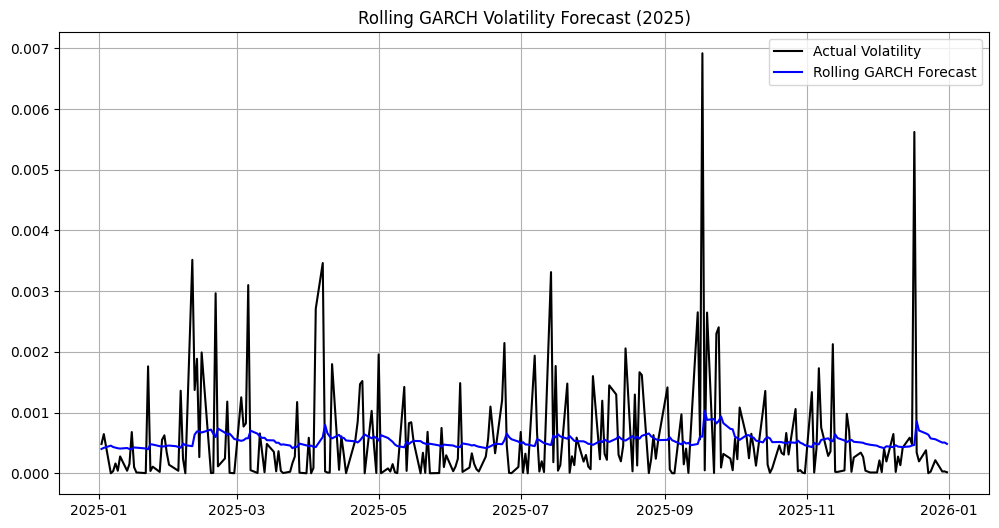

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(test.index, test_returns**2,
         label='Actual Volatility',
         color='black')

plt.plot(test.index, garch_variance,
         label='Rolling GARCH Forecast',
         color='blue')

plt.title("Rolling GARCH Volatility Forecast (2025)")
plt.legend()
plt.grid(True)
plt.show()


LSTM


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Use Close price
data = df[['Close']]

# Train-test split
train = data[:'2024-12-31']
test = data['2025-01-01':]

# Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


In [ ]:
def create_sequences(data, window=30):
    X = []
    y = []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 30

X_train, y_train = create_sequences(train_scaled, window_size)

# Combine last 30 days of train with test for proper sequence
combined = np.vstack((train_scaled[-window_size:], test_scaled))
X_test, y_test = create_sequences(combined, window_size)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(window_size,1)))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=32,
          verbose=1)


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - loss: 0.0770
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0041
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0029
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0030
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0033
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0030
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0028
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0029
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0029
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0025


In [ ]:
# Take last 30 days from full scaled data
last_30_days = data[-30:]

# Scale it
last_30_scaled = scaler.transform(last_30_days)

# Reshape for LSTM
X_next = np.reshape(last_30_scaled, (1, 30, 1))


In [ ]:
next_day_scaled = model.predict(X_next)

# Convert back to original price
next_day_price = scaler.inverse_transform(next_day_scaled)

print("Predicted Next Day Closing Price:", next_day_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Next Day Closing Price: 341.65765


In [ ]:
predictions = model.predict(X_test)

# Convert back to original scale
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

lstm_mse = mean_squared_error(actual_prices, predicted_prices)
lstm_rmse = np.sqrt(lstm_mse)

print("LSTM Results")
print("MSE:", lstm_mse)
print("RMSE:", lstm_rmse)


LSTM Results
MSE: 327.413240348107
RMSE: 18.09456383414939


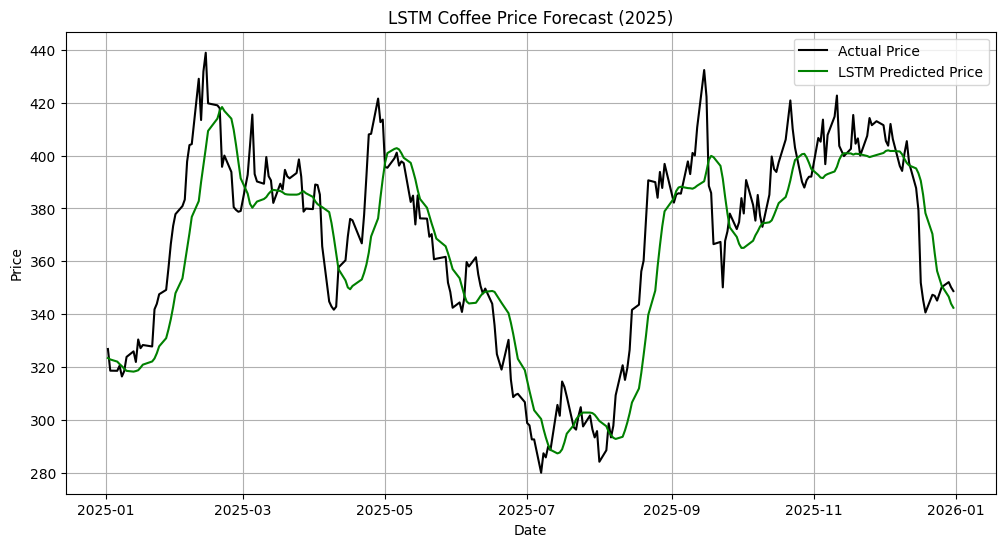

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(test.index[:len(actual_prices)],
         actual_prices,
         label='Actual Price',
         color='black')

plt.plot(test.index[:len(predicted_prices)],
         predicted_prices,
         label='LSTM Predicted Price',
         color='green')

plt.title("LSTM Coffee Price Forecast (2025)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
comparison = pd.DataFrame({
    "Model": ["Holt-Winters", "ARIMA", "SARIMA", "LSTM",
              "ARCH", "GARCH"],

    "RMSE": [hw_rmse,
             arima_rmse,
             sarima_rmse,
             lstm_rmse,
             arch_rmse,
             garch_rmse]
})

comparison

,Model,RMSE
0,Holt-Winters,8.931855
1,ARIMA,8.915463
2,SARIMA,38.688219
3,LSTM,18.094564
4,ARCH,0.000879
5,GARCH,0.000878


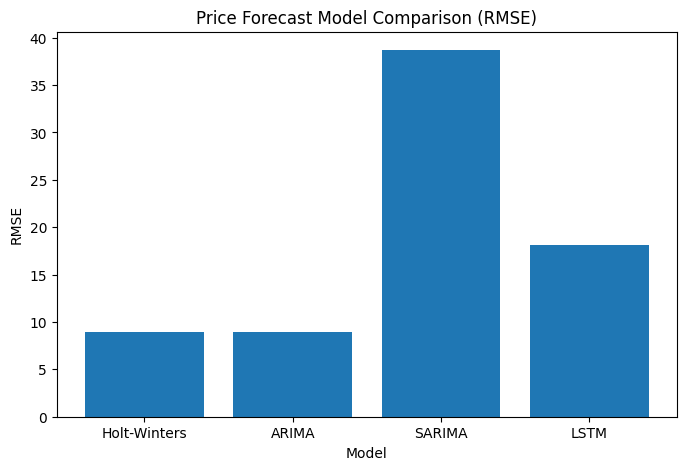

In [ ]:
price_models = comparison.iloc[0:4]

plt.figure(figsize=(8,5))
plt.bar(price_models["Model"], price_models["RMSE"])

plt.title("Price Forecast Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.xlabel("Model")

plt.show()


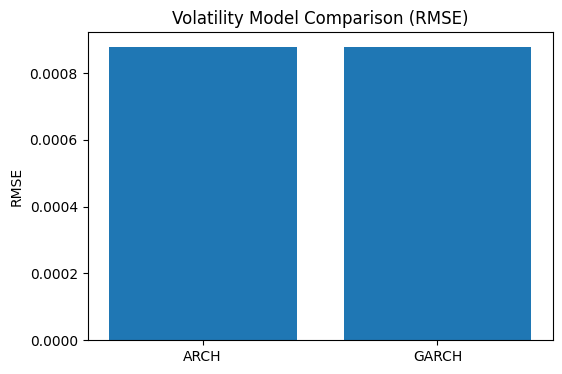

In [ ]:
vol_models = comparison.iloc[4:6]

plt.figure(figsize=(6,4))
plt.bar(vol_models["Model"], vol_models["RMSE"])

plt.title("Volatility Model Comparison (RMSE)")
plt.ylabel("RMSE")

plt.show()


In [ ]:
next_day_predictions = {
    "Holt-Winters": next_day_prediction.iloc[0],
    "ARIMA": None, # ARIMA next-day forecast variable was overwritten
    "SARIMA": next_day_forecast,
    "LSTM": next_day_price[0][0]
}

print("Next Day Predictions:")
print(next_day_predictions)

Next Day Predictions:
{'Holt-Winters': np.float64(348.90187250884685), 'ARIMA': None, 'SARIMA': np.float64(348.8616165654976), 'LSTM': np.float32(341.65765)}


In [ ]:
import pandas as pd

next_day_table = pd.DataFrame({
    "Model": ["Holt-Winters", "ARIMA", "SARIMA", "LSTM"],
    "Next Day Prediction": [
        next_day_prediction.iloc[0],
        arima_next_day_forecast, # Use the specific ARIMA forecast variable
        next_day_forecast,
        next_day_price[0][0]
    ]
})

next_day_table

,Model,Next Day Prediction
0,Holt-Winters,348.901873
1,ARIMA,348.588675
2,SARIMA,348.861617
3,LSTM,341.657654


In [ ]:
accuracy_table = pd.DataFrame({
    "Model": ["Holt-Winters", "ARIMA", "SARIMA", "LSTM"],
    "RMSE": [
        hw_rmse,
        arima_rmse,
        sarima_rmse,
        lstm_rmse
    ]
})

accuracy_table = accuracy_table.sort_values(by="RMSE")
accuracy_table


,Model,RMSE
1,ARIMA,8.915463
0,Holt-Winters,8.931855
3,LSTM,18.094564
2,SARIMA,38.688219


In [ ]:
import pandas as pd
import numpy as np

# Create accuracy table using your computed variables

results_table = pd.DataFrame({
    "Model": [
        "Holt–Winters",
        "ARIMA (1,1,1)",
        "SARIMA",
        "ARCH (1)",
        "GARCH (1,1)",
        "LSTM / RNN"
    ],

    "RMSE": [
        round(hw_rmse, 4),
        round(arima_rmse, 4),
        round(sarima_rmse, 4),
        round(arch_rmse, 7),
        round(garch_rmse, 7),
        round(lstm_rmse, 4)
    ],

    "MSE": [
        round(hw_mse, 4),
        round(arima_mse, 4),
        round(sarima_mse, 4),
        arch_mse,
        garch_mse,
        round(lstm_mse, 4)
    ],

    "MAPE": [
        round(hw_mape, 4),
        round(arima_mape, 4),
        round(mape, 4) if 'mape' in globals() else None, # Use the last calculated mape for SARIMA if it exists
        np.inf,        # ARCH MAPE (infinite)
        None,          # GARCH MAPE not used
        None           # LSTM MAPE not computed
    ],

    "Key Assumption": [
        "Exponential smoothing with trend",
        "Linear autoregressive structure",
        "Seasonal + linear structure",
        "Volatility depends on past shocks",
        "Volatility depends on past shocks & past variance",
        "Learns nonlinear dependencies"
    ],

    "Strength": [
        "Simple, stable for trend data",
        "Strong linear forecasting",
        "Captures seasonality",
        "Captures volatility clustering",
        "Models volatility persistence",
        "Captures complex patterns"
    ],

    "Weakness": [
        "Cannot capture complex dynamics",
        "Limited nonlinear capability",
        "Overfitting / high error in this case",
        "No variance persistence",
        "Not for price prediction",
        "Requires tuning & more data"
    ]
})

results_table

,Model,RMSE,MSE,MAPE,Key Assumption,Strength,Weakness
0,Holt–Winters,8.931900,7.977800e+01,0.0185,Exponential smoothing with trend,"Simple, stable for trend data",Cannot capture complex dynamics
1,"ARIMA (1,1,1)",8.915500,7.948550e+01,1.8476,Linear autoregressive structure,Strong linear forecasting,Limited nonlinear capability
2,SARIMA,38.688200,1.496778e+03,inf,Seasonal + linear structure,Captures seasonality,Overfitting / high error in this case
3,ARCH (1),0.000879,7.717836e-07,inf,Volatility depends on past shocks,Captures volatility clustering,No variance persistence
4,"GARCH (1,1)",0.000878,7.710447e-07,NaN,Volatility depends on past shocks & past variance,Models volatility persistence,Not for price prediction
5,LSTM / RNN,18.094600,3.274132e+02,NaN,Learns nonlinear dependencies,Captures complex patterns,Requires tuning & more data
